<a href="https://colab.research.google.com/github/sk22-svg/firstproject/blob/main/PBMC%20data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 2.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=727d7f634e298a06cdde9bfef73aa83b8e685afcc828438cf819fea9ffc1134f
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [2]:
import scanpy as sc
import os

In [3]:
# First, set the parameters for the output image in the format below
 # package.module,function()

#figure parameters
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.logging.print_header() # logging.print_header give the info about all the libraries associated with a particular library or the project you're running

scanpy==1.10.2 anndata==0.10.9 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.2 pynndescent==0.5.13


In [4]:
# PBMC dataset
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.datasets.pbmc3k.html#scanpy.datasets.pbmc3k
adata = sc.datasets.pbmc3k()
adata

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [5]:
!unzip filtered_gene_bc_matrices.zip

Archive:  filtered_gene_bc_matrices.zip
   creating: filtered_gene_bc_matrices/
  inflating: __MACOSX/._filtered_gene_bc_matrices  
  inflating: filtered_gene_bc_matrices/.DS_Store  
  inflating: __MACOSX/filtered_gene_bc_matrices/._.DS_Store  
   creating: filtered_gene_bc_matrices/hg19/
  inflating: __MACOSX/filtered_gene_bc_matrices/._hg19  
  inflating: filtered_gene_bc_matrices/hg19/genes.tsv  
  inflating: __MACOSX/filtered_gene_bc_matrices/hg19/._genes.tsv  
  inflating: filtered_gene_bc_matrices/hg19/barcodes.tsv  
  inflating: __MACOSX/filtered_gene_bc_matrices/hg19/._barcodes.tsv  
 extracting: filtered_gene_bc_matrices/hg19/.Rapp.history  
  inflating: filtered_gene_bc_matrices/hg19/matrix.mtx  
  inflating: __MACOSX/filtered_gene_bc_matrices/hg19/._matrix.mtx  


In [6]:
import os

# Use a relative path instead of an absolute path
filt_folderpath = "./filtered_gene_bc_matrices/hg19"
print(filt_folderpath)

# Check if the directory exists
if os.path.exists(filt_folderpath):
  print(os.listdir(filt_folderpath))  # lets you know the contents of folder
else:
  print(f"Directory not found: {filt_folderpath}")

./filtered_gene_bc_matrices/hg19
['.Rapp.history', 'matrix.mtx', 'genes.tsv', 'barcodes.tsv']


In [7]:
adata = sc.read_10x_mtx( filt_folderpath,   var_names='gene_symbols',   cache=True) # this was loading the files into AnnData object

In [8]:
# list the cell names
adata.obs

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1
TTTGCATGAGAGGC-1


In [9]:
adata.var

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [10]:
# AnnData stores sparse data in Compressed Sparsed Row matrix
adata.X
# Sparse Matrix: A matrix where most of the elements are zero. Special data structures are used to store only the non-zero values, saving memory and computational resources.
# 2700x32738: The dimensions of the matrix. It has 2700 rows and 32738 columns.
# numpy.float32: The data type of the elements in the matrix. In this case, it's a 32-bit floating-point number.
# 2286884 stored elements: The number of non-zero elements in the matrix.
# Compressed Sparse Column format (CSC): A specific way of storing sparse matrices efficiently.

<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Column format>

In [11]:
import pandas


In [12]:
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Quality Control on AnnData Object

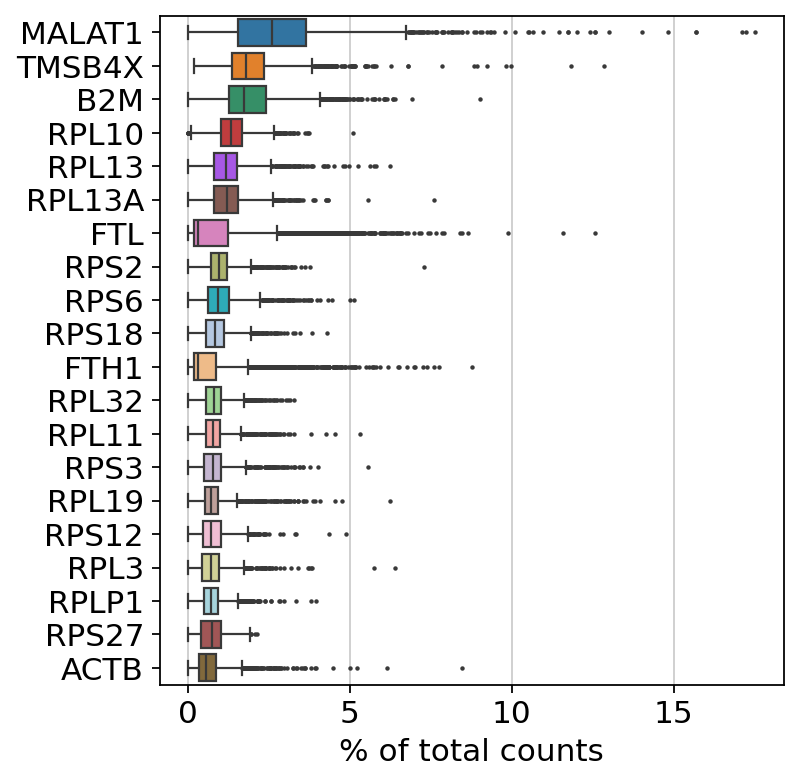

In [13]:
# The number of top genes with highest mean fraction over all cells (expression)
sc.pl.highest_expr_genes(adata, n_top=20)
# What the function does:

# Calculates the average expression of each gene across all cells. Identifies
# the n_top genes (in this case, 20) with the highest average expression.
# Creates a boxplot for each of the top genes. The boxplot shows the
# distribution of expression values for that gene across all cells

In [14]:
adata_wQC = adata.copy()
sc.pp.calculate_qc_metrics(adata_wQC, log1p = False , inplace = True) # 'adata_wQC' is now correctly passed as the first argument

In [15]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [16]:
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [17]:
adata_wQC.obs
#this gives
# n_genes_by_counts: The number of genes with at least one count in each cell.

# total_counts: The total number of counts in each cell.

,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
AAACATACAACCAC-1,781,2421.0,47.748864,63.279637,74.969021,88.393226
AAACATTGAGCTAC-1,1352,4903.0,45.502753,61.023863,71.813176,82.622884
AAACATTGATCAGC-1,1131,3149.0,41.314703,53.794856,65.449349,79.961893
AAACCGTGCTTCCG-1,960,2639.0,39.029936,52.898825,66.691929,82.569155
AAACCGTGTATGCG-1,522,981.0,44.852192,55.657492,67.176351,97.757390
...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,3461.0,39.237215,52.528171,65.761341,81.074834
TTTCTACTGAGGCA-1,1227,3447.0,37.278793,51.900203,63.881636,78.909196
TTTCTACTTCCTCG-1,622,1684.0,45.783848,61.638955,74.940618,92.755344
TTTGCATGAGAGGC-1,454,1024.0,48.046875,62.402344,75.195312,100.000000


In [18]:
adata_wQC.var
# this gives
#n_cells_by_counts: The number of cells in which a gene is detected.
#mean_counts: The average expression level of a gene across all cells.
#pct_dropout_by_counts: The percentage of cells in which a gene has zero counts.
#total_counts: The total number of counts for a gene across all cells.

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MIR1302-10,ENSG00000243485,0,0.0,100.0,0.0
FAM138A,ENSG00000237613,0,0.0,100.0,0.0
OR4F5,ENSG00000186092,0,0.0,100.0,0.0
RP11-34P13.7,ENSG00000238009,0,0.0,100.0,0.0
RP11-34P13.8,ENSG00000239945,0,0.0,100.0,0.0
...,...,...,...,...,...
AC145205.1,ENSG00000215635,0,0.0,100.0,0.0
BAGE5,ENSG00000268590,0,0.0,100.0,0.0
CU459201.1,ENSG00000251180,0,0.0,100.0,0.0
AC002321.2,ENSG00000215616,0,0.0,100.0,0.0


In [19]:
adata_wQC.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [20]:
adata_wQC.var_names.str.startswith('MT-') # the result of this fuction will tell if their are any mitochondrial genes present

array([False, False, False, ..., False, False, False])

In [21]:
adata_wQC.var['mt'] = adata_wQC.var_names.str.startswith('MT-') # creates a new column in the var dataframe with boolean values.

In [22]:
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [23]:
adata_wQC.var['mt']

,mt
MIR1302-10,False
FAM138A,False
OR4F5,False
RP11-34P13.7,False
RP11-34P13.8,False
...,...
AC145205.1,False
BAGE5,False
CU459201.1,False
AC002321.2,False


In [24]:
adata_wQC.var

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mt
MIR1302-10,ENSG00000243485,0,0.0,100.0,0.0,False
FAM138A,ENSG00000237613,0,0.0,100.0,0.0,False
OR4F5,ENSG00000186092,0,0.0,100.0,0.0,False
RP11-34P13.7,ENSG00000238009,0,0.0,100.0,0.0,False
RP11-34P13.8,ENSG00000239945,0,0.0,100.0,0.0,False
...,...,...,...,...,...,...
AC145205.1,ENSG00000215635,0,0.0,100.0,0.0,False
BAGE5,ENSG00000268590,0,0.0,100.0,0.0,False
CU459201.1,ENSG00000251180,0,0.0,100.0,0.0,False
AC002321.2,ENSG00000215616,0,0.0,100.0,0.0,False


In [25]:
sc.pp.calculate_qc_metrics(adata_wQC,qc_vars= ['mt'],percent_top = None, log1p = False, inplace = True)

In [26]:
adata_wQC

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

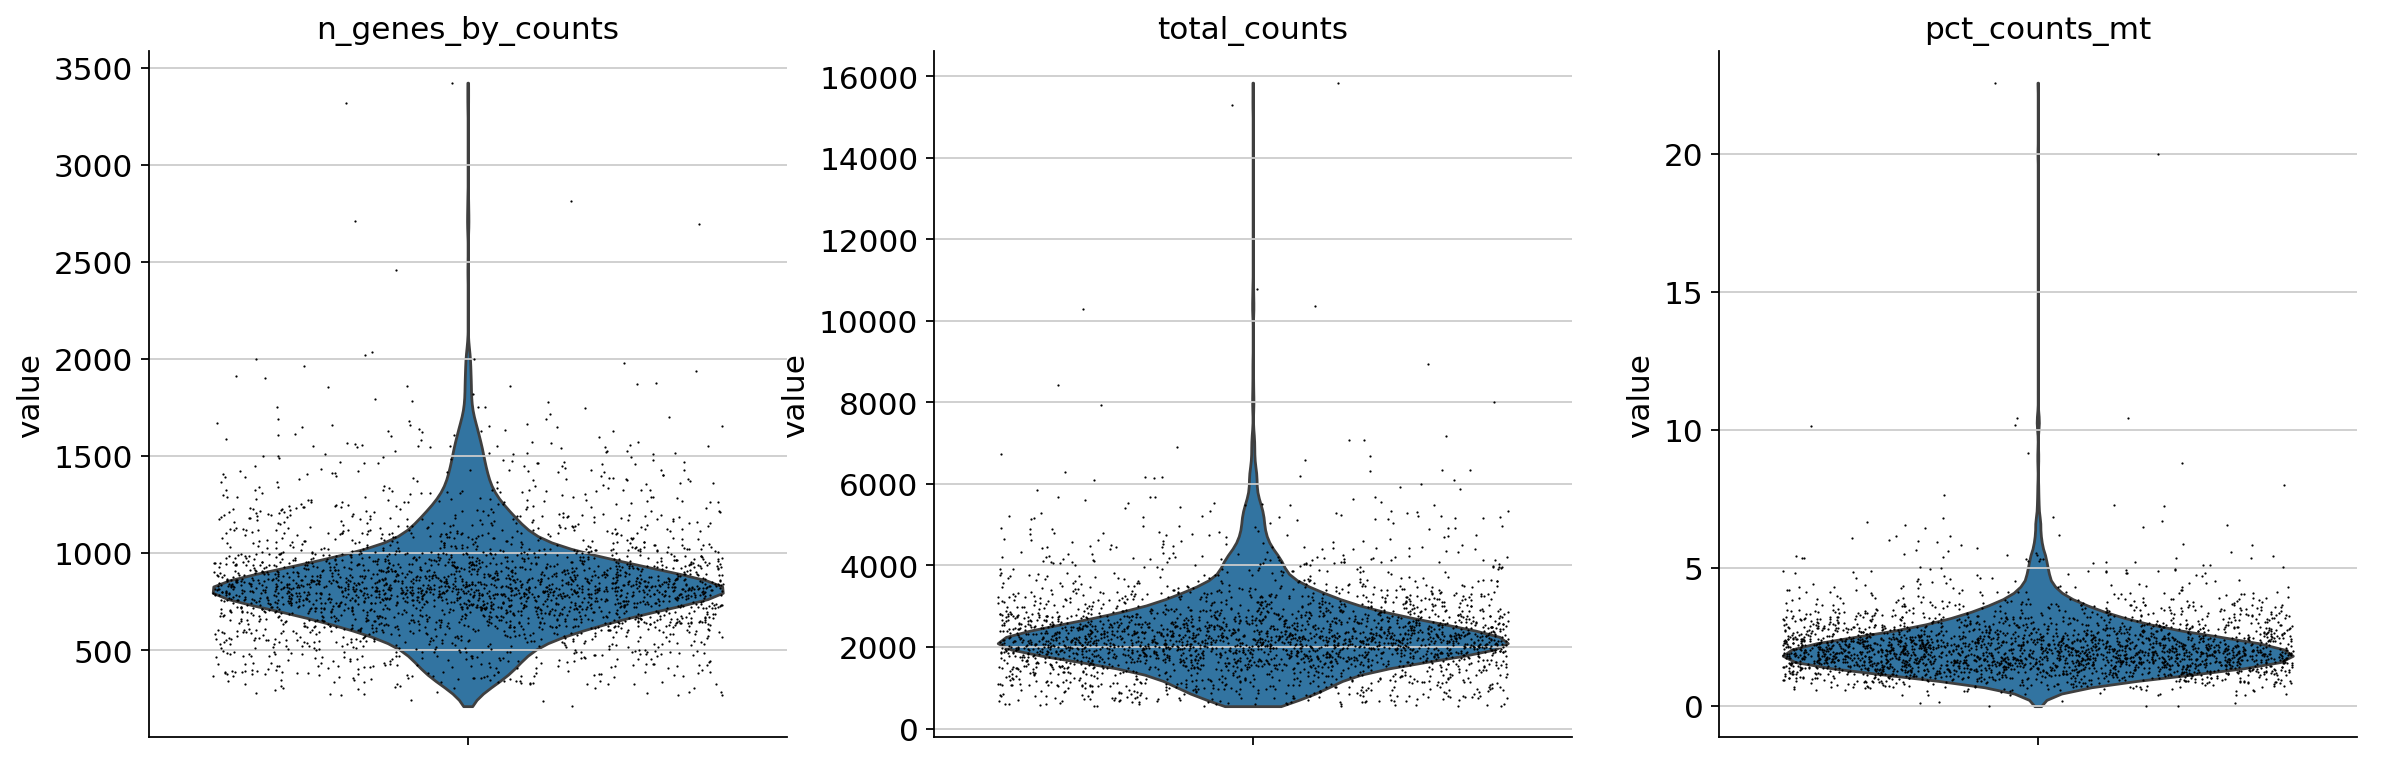

In [27]:
# plot a violin plot with same qc metrics
sc.pl.violin(adata_wQC, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

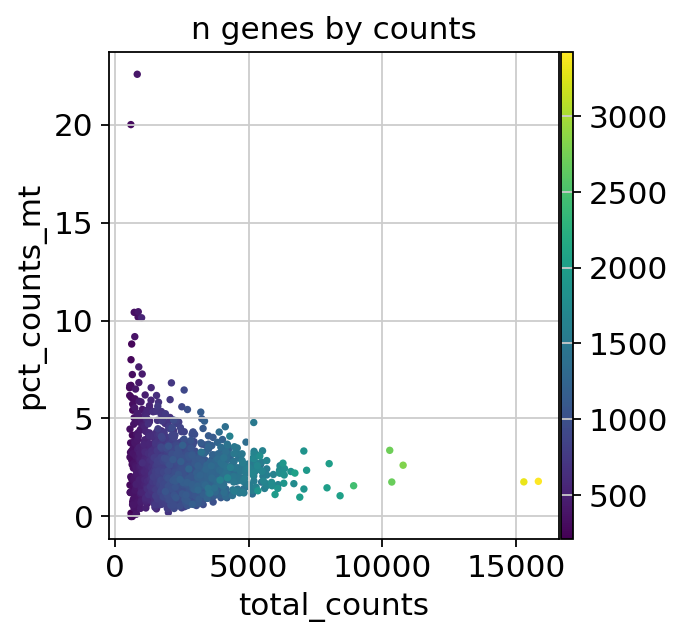

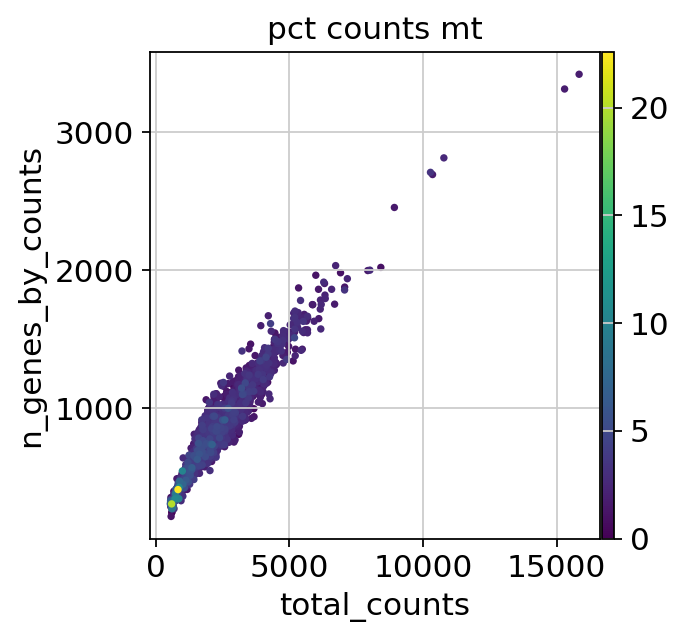

In [28]:
sc.pl.scatter(adata_wQC, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata_wQC, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

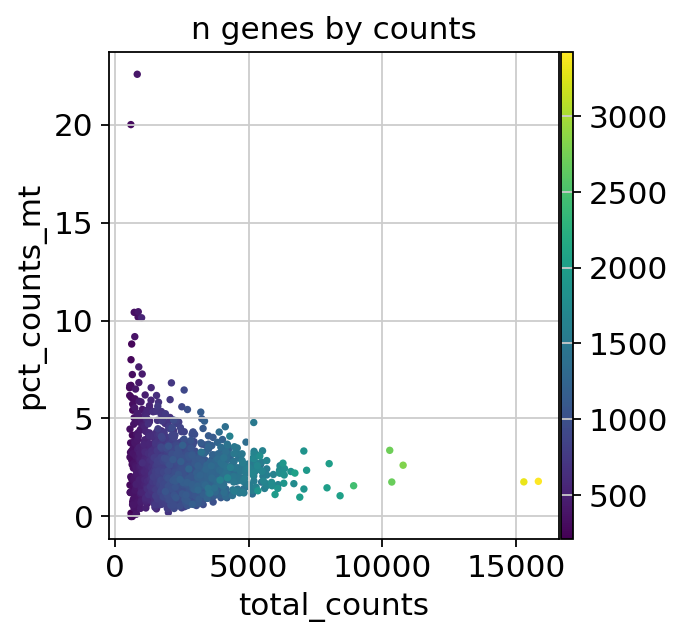

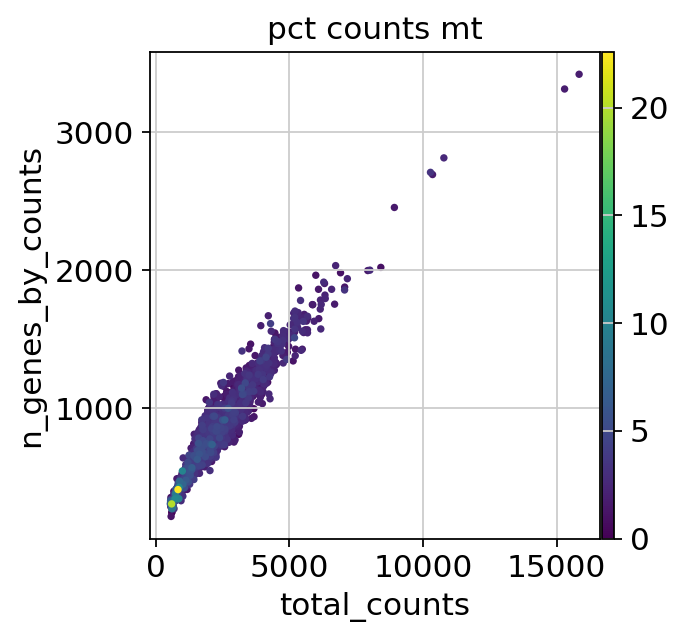

In [29]:
sc.pl.scatter(adata_wQC, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata_wQC, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

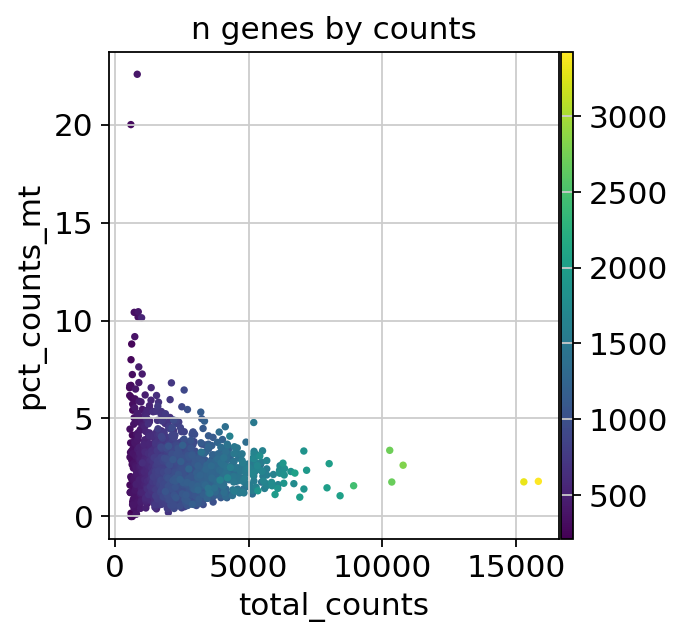

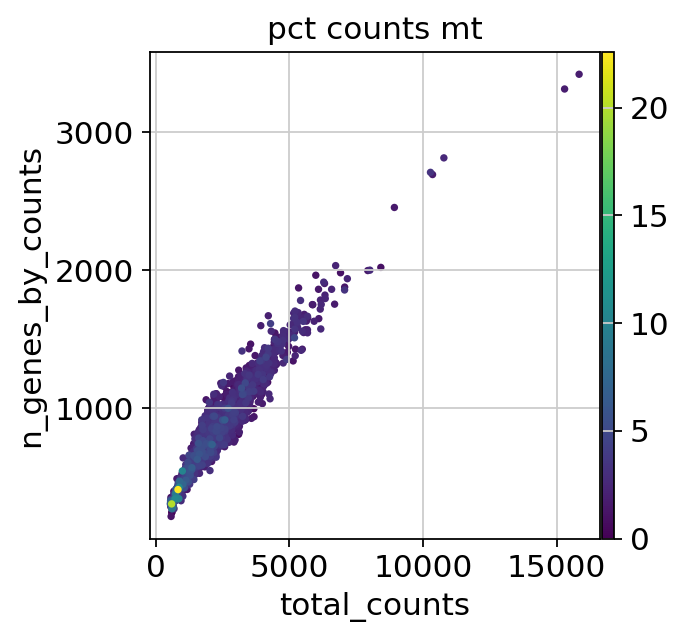

In [30]:
sc.pl.scatter(adata_wQC, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata_wQC, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

In the first plot, we can see that there are a lot of cells with more than 5% of mitochondrial genes but very less total counts. These will be dead/likely dying cells.

Also, by seeing 2nd plot, some cells have very high total counts (genes). As a whole, we will be filtering : 1) cells with < 200 genes and higher mt genes (> 5%). 2)cells with optimal mt genes (>5%) but higher genes expressed (doublets). 3) genes that are expressed in less than "X" cells.

Part 4 Filtering cell and genes

filtering cells with < 200 genes and higher mt genes (>5%)




In [31]:
adata_wQC
# copy into new AnnData object adata_wQC_filt
adata_wQC_filt = adata_wQC.copy()
print(adata_wQC)
sc.pp.filter_cells(adata_wQC_filt, min_genes = 200)
print(adata_wQC_filt)
adata_wQC_filt = adata_wQC_filt[adata_wQC_filt.obs.pct_counts_mt < 5]
print(adata_wQC_filt)

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
View of AnnData object with n_obs × n_vars = 2643 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
  

Possible doublet cells

In [32]:
print(adata_wQC_filt)
adata_wQC_filt = adata_wQC_filt[adata_wQC_filt.obs.n_genes_by_counts < 2500, :]
print(adata_wQC_filt)

View of AnnData object with n_obs × n_vars = 2643 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
View of AnnData object with n_obs × n_vars = 2638 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'


In [33]:
#adata_wQC_filt = adata_wQC_filt[adata_wQC_filt.obs.n_genes_by_counts < 2500, :]: This is the core filtering line. Let's break it down:
#adata_wQC_filt.obs.n_genes_by_counts < 2500: This part creates a boolean array. It checks which cells in the adata_wQC_filt object have a value less than 2500 in the n_genes_by_counts column of the .obs attribute (which usually stores cell-level metadata).
#adata_wQC_filt[...]: This uses the boolean array created in the previous step to filter the adata_wQC_filt object. It selects cells where the condition (n_genes_by_counts < 2500) is True. The comma and colon (, :) indicate that you are selecting rows (cells) based on the boolean array and keeping all columns (genes).
#adata_wQC_filt = ...: The filtered AnnData object is then assigned back to adata_wQC_filt, overwriting the original object.
#print(adata_wQC_filt): This line prints the adata_wQC_filt object again after the filtering. This allows you to see the effect of the filtering operation and compare it to the original object.

In [34]:
print(adata_wQC_filt)
sc.pp.filter_genes(adata_wQC_filt, min_cells=3)
print(adata_wQC_filt)
#

View of AnnData object with n_obs × n_vars = 2638 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:282: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


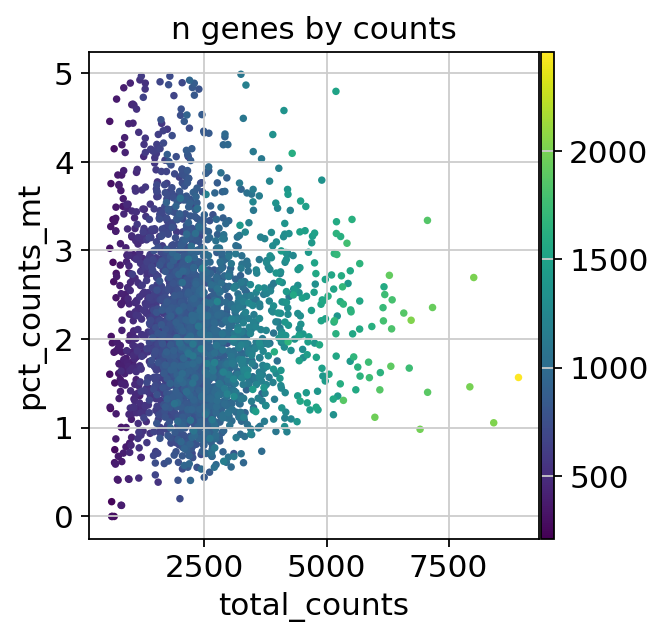

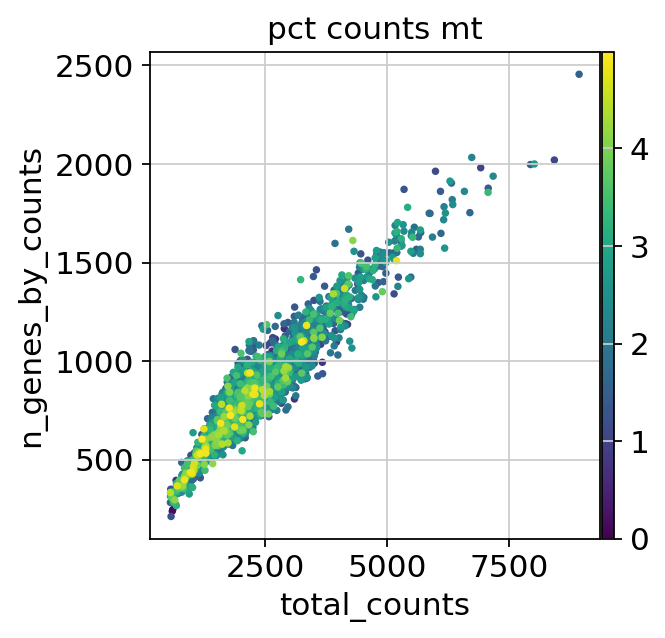

In [35]:
sc.pl.scatter(adata_wQC_filt, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata_wQC_filt, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

In [36]:
!pip install scanpy
import scanpy as sc

# Load your data
adata_wQC_filt = sc.read_h5ad('pbmc3k_raw.h5ad') # Replace 'your_data.h5ad' with the actual file name

Normalization of the data

In [37]:
norm_data = adata_wQC_filt.copy()
sc.pp.normalize_total(norm_data, target_sum=1e4)
norm_data



AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [38]:
sc.pp.log1p(norm_data) # log transformation of the data, to decrease the spread
norm_data

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'
    uns: 'log1p'

In [39]:
norm_data

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'
    uns: 'log1p'

Finding Highly Variable Genes

HVG vs DEG (Differentially expressed genes)



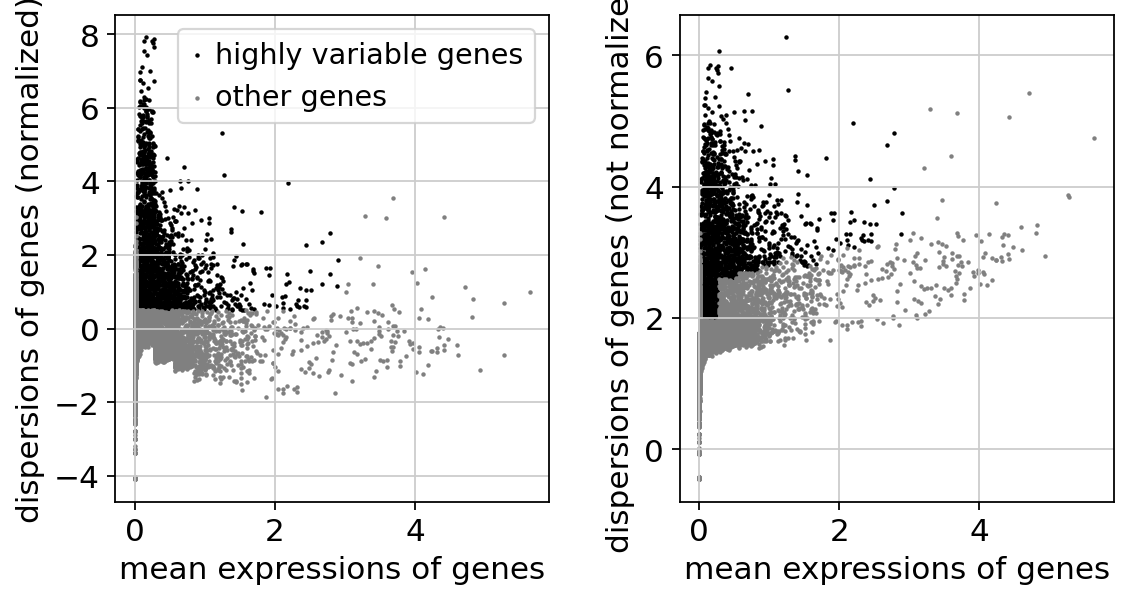

In [40]:
HVG_data = norm_data.copy()
sc.pp.highly_variable_genes(HVG_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(HVG_data)

Interpretation:
Left Panel (Normalized Dispersions): After normalizing for the mean expression levels, highly variable genes still exhibit a clear distinction from other genes, meaning that their variance isn't simply due to expression level but is an inherent feature of these genes.

Right Panel (Unnormalized Dispersions): Without normalization, the general trend shows that dispersion decreases as mean expression increases. However, highly variable genes still show higher dispersion compared to other genes.

Conclusion:
The figure likely shows the result of a selection process identifying genes with high variability, possibly for use in downstream analyses like clustering or differential expression studies. Highly variable genes are of particular interest because their variability may reflect important biological differences across conditions or cell types.








In [41]:
print(norm_data)
print("###########")
print(HVG_data)

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'
    uns: 'log1p'
###########
AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [42]:
#now we will select just the highly variable genes
HVG_data = HVG_data[:, HVG_data.var.highly_variable]
print(HVG_data)

View of AnnData object with n_obs × n_vars = 2700 × 2078
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


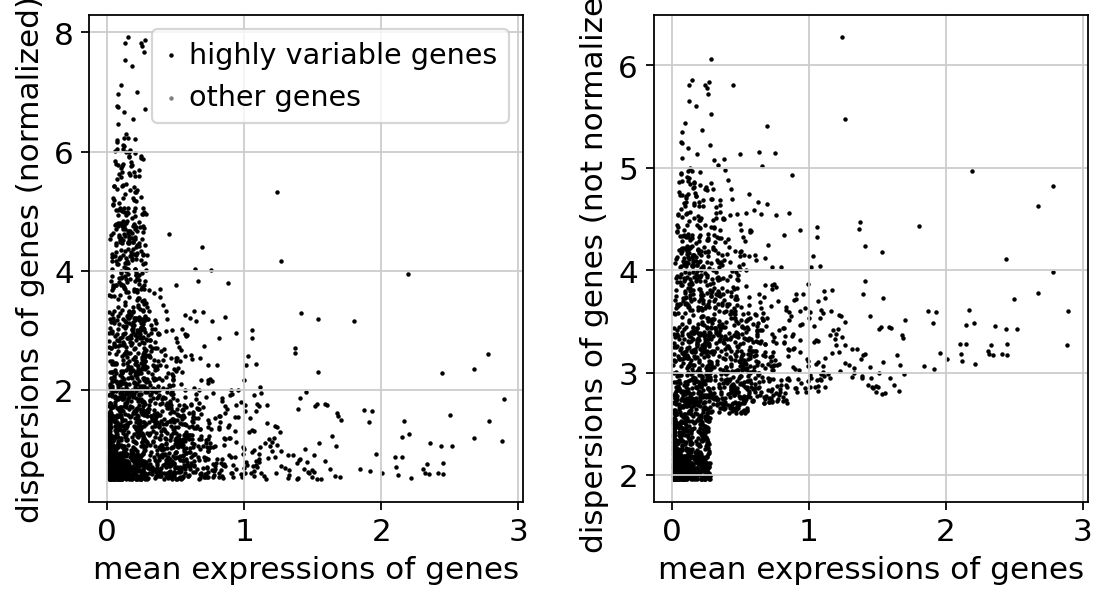

In [43]:
sc.pl.highly_variable_genes(HVG_data)
# by doing the previous step, we filtered out the "other genes"

This graph shows that the high variation in gene expression is a inherent nature of the genes. As the mean expression of genes increases, the spread of genes (variations) decreases.

# **Scaling the data**

In [44]:
# copy into new AnnData object pcHVG_data for Principal Component Analysis
pcHVG_data = HVG_data.copy()
#scale to unit variance for PCA, clip values exceeding standard deviation 10
sc.pp.scale(pcHVG_data, max_value=10)

In [45]:
print(HVG_data)
print(pcHVG_data)

View of AnnData object with n_obs × n_vars = 2700 × 2078
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
AnnData object with n_obs × n_vars = 2700 × 2078
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'


# Dimensionality reduction with PCA

In [46]:
sc.tl.pca(pcHVG_data)
#This line of code performs principal component analysis (PCA) on the pcHVG_data object using the scanpy library.
#sc.tl.pca(): This is a function from the scanpy.tl module that performs PCA on an AnnData object.
#pcHVG_data: This is the AnnData object that contains the data to be analyzed.
#This function calculates the principal components of the data and stores them in the pcHVG_data.obsm['X_pca'] attribute. This information can then be used for downstream analyses, such as clustering or visualization.



In [47]:
print(pcHVG_data)

AnnData object with n_obs × n_vars = 2700 × 2078
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


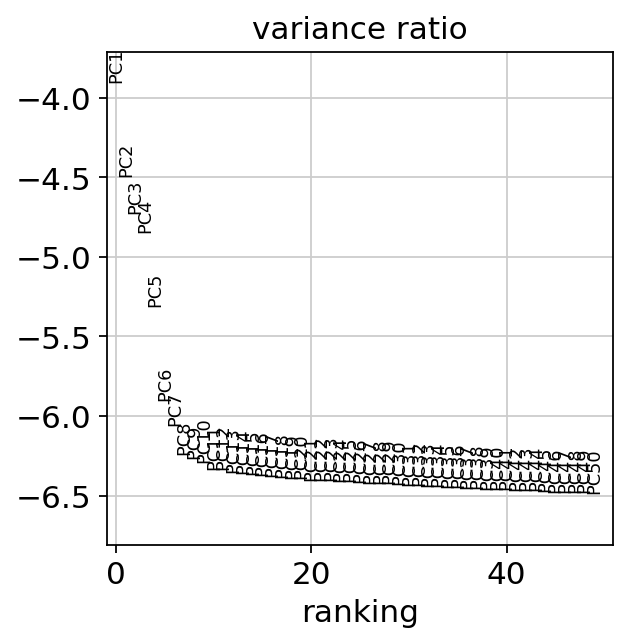

In [48]:
# we will now plot 50 PCs that may be contributing to the varinace in the data
# basically, when the curve starts to flatten will roughly be the point from which we can choose the PCs
sc.pl.pca_variance_ratio(pcHVG_data, log=True, n_pcs=50)

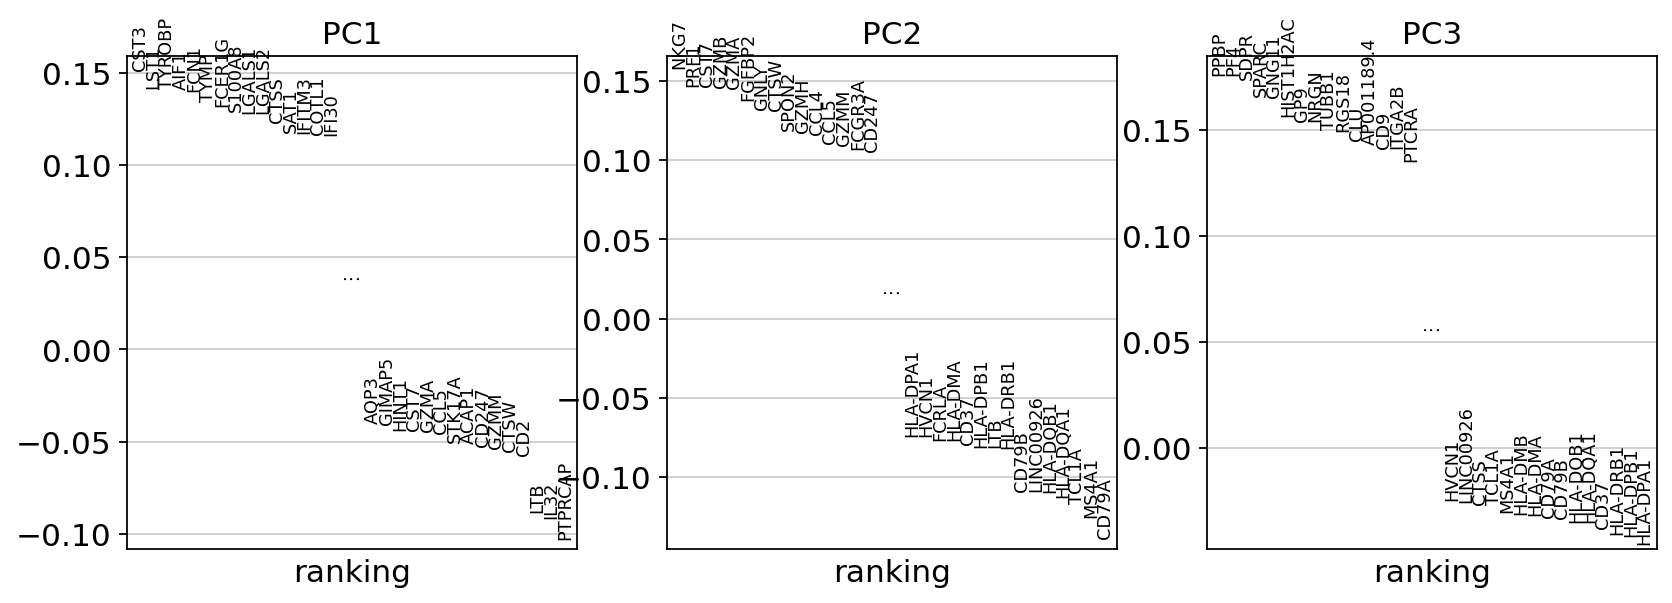

In [49]:
sc.pl.pca_loadings(pcHVG_data)

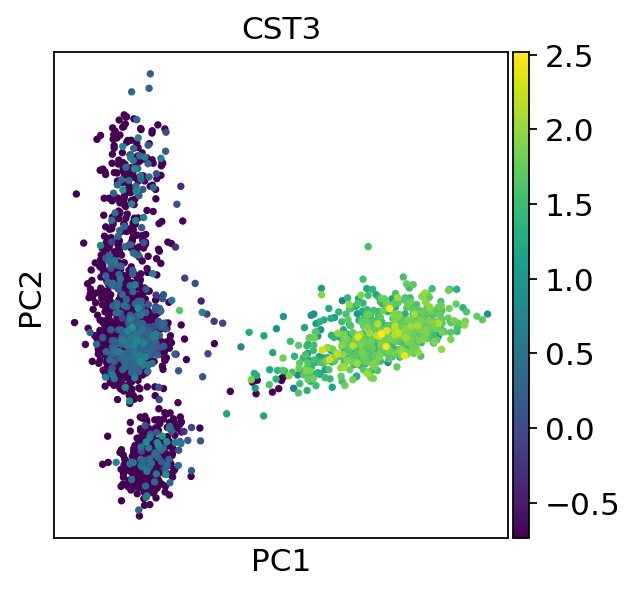

In [50]:
sc.pl.pca(pcHVG_data, color='CST3')

# Finding Neighbours by computing the neighbourhood graph

In [51]:
sc.pp.neighbors(pcHVG_data, n_pcs=15)

In [52]:
pcHVG_data

AnnData object with n_obs × n_vars = 2700 × 2078
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [53]:
pcHVG_data.obsp

PairwiseArrays with keys: distances, connectivities

In [54]:
# obsp attribute contains 2 keys, distances and connectivities, have a value that is a sparse matrix
for key, value in pcHVG_data.obsp.items():
  print("key :" , key)
  print("value :" , value)

key : distances
value :   (0, 314)	4.268745147568275
  (0, 1808)	4.273745231079047
  (0, 487)	4.2838714815696175
  (0, 1915)	4.304056055519344
  (0, 1396)	4.33986660378771
  (0, 1619)	4.364541987524493
  (0, 140)	4.435802511141212
  (0, 2196)	4.45446007775921
  (0, 1668)	4.4690937897013825
  (0, 1023)	4.508214235172277
  (0, 398)	4.509515239097257
  (0, 2021)	4.568905449139195
  (0, 2337)	4.6124406350716916
  (0, 980)	4.619203801761406
  (1, 169)	4.461469147596569
  (1, 517)	4.647950629374261
  (1, 2397)	5.107446709129395
  (1, 110)	5.189559527689288
  (1, 1224)	5.4939658269052005
  (1, 1073)	5.575332754836113
  (1, 2655)	5.5771365532124735
  (1, 2463)	5.5979126514136
  (1, 1016)	5.796053023554518
  (1, 778)	5.803455494152378
  (1, 22)	5.804666141763365
  :	:
  (2698, 2248)	3.820434942799137
  (2698, 2271)	3.829845680135792
  (2698, 1453)	3.9940053604464407
  (2698, 997)	4.007833915787081
  (2698, 2448)	4.130361136471699
  (2698, 1116)	4.1431909060275105
  (2698, 2173)	4.21632326760800

# Embedding the neighbourhood graph by running umap

In [55]:
umHVG_data = pcHVG_data.copy()
sc.tl.umap(umHVG_data)

In [56]:
umHVG_data

AnnData object with n_obs × n_vars = 2700 × 2078
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [58]:
print(umHVG_data.obsm ['X_pca'])

[[-4.303356    0.4465327   0.35558045 ... -1.2934308   0.7532588
   0.6592896 ]
 [-0.32207814 -5.9013915  -2.1424737  ... -0.6415183   1.0946501
  -0.63820434]
 [-1.8479879   3.029457    0.5644688  ... -0.64608765  0.02232842
  -1.883368  ]
 ...
 [-2.2247658  -7.190571   -1.5395755  ... -0.3578625  -1.071471
   0.50715977]
 [-3.1617367  -7.687938   -1.0039049  ...  0.80540997 -3.1682336
  -3.6494534 ]
 [-2.683631   -1.0400653   0.45814577 ... -1.0034876  -0.23453635
   0.75228953]]


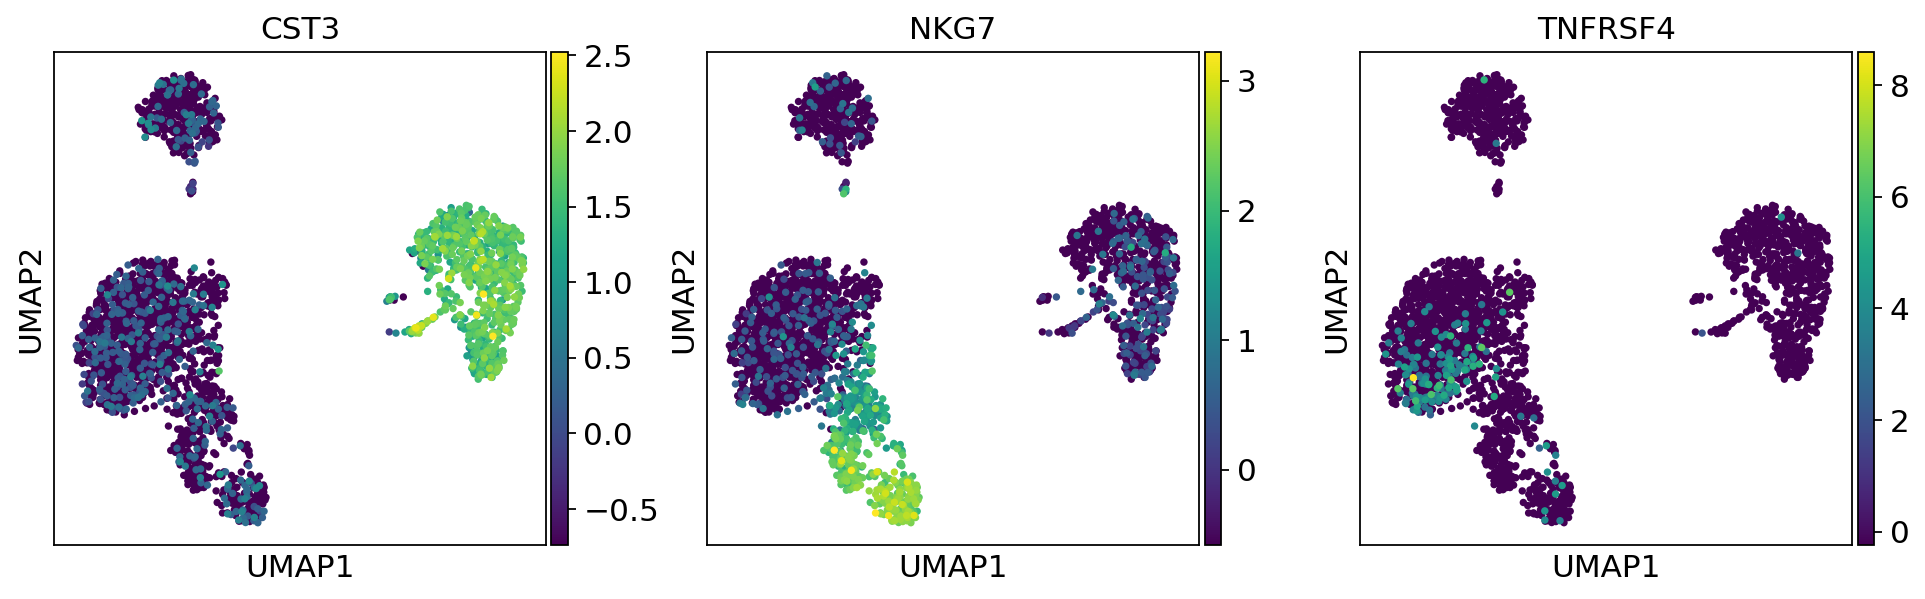

In [59]:
sc.pl.umap(umHVG_data, color=['CST3','NKG7', 'TNFRSF4'])